In [1]:
import stocktrends as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stocktrends import indicators

In [27]:
df_i = pd.read_csv(r"C:\Users\Dhruv\Downloads\ICICI.csv")
df_i.columns = [i.lower() for i in df_i.columns]

In [28]:
df_i.columns

Index(['symbol', 'series', 'date', 'prev close', 'open price', 'high price',
       'low price', 'last price', 'close price', 'average price',
       'total traded quantity', 'turnover', 'no. of trades'],
      dtype='object')

In [29]:
df_p = pd.read_csv(r"C:\Users\Dhruv\Downloads\BOB.csv")
df_p.columns = [i.lower() for i in df_p.columns]

In [30]:
print(len(df_p))

244


In [31]:
df_i.columns = ['symbol', 'series', 'date', 'prev close', 'open', 'high','low', 'last price', 'close', 'average price','total traded quantity', 'turnover', 'no. of trades']

df_p.columns = ['symbol', 'series', 'date', 'prev close', 'open', 'high','low', 'last price', 'close', 'average price','total traded quantity', 'turnover', 'no. of trades']

In [53]:
df_i = df_i[['date','low', 'open', 'high', 'close']]
pnf_i = indicators.PnF(df_i)
pnf_i.box_size = 1
pnf_i.reversal_size = 5

df_p = df_p[['date','low', 'open', 'high', 'close']]
pnf_p = indicators.PnF(df_p)
pnf_p.box_size = 1
pnf_p.reversal_size = 1

In [54]:
renko_i = indicators.Renko(df_i)
renko_p = indicators.Renko(df_p)

In [55]:
rows = 5

In [56]:
print('\n\nPnF bar data - based on close column')
data_i = pnf_i.get_bar_ohlc_data(source='close')
print(data_i.tail(rows))
print(len(data_i))

print('\n\nPnF bar data - based on close column')
data_p = pnf_p.get_bar_ohlc_data(source='close')
print(data_p.tail(rows))
print(len(data_p))



PnF bar data - based on close column
           date   open  close   high    low
66  09-Apr-2020  320.0  342.0  342.0  320.0
67  13-Apr-2020  341.0  328.0  341.0  328.0
68  16-Apr-2020  329.0  375.0  375.0  329.0
69  20-Apr-2020  374.0  332.0  374.0  332.0
70  23-Apr-2020  333.0  352.0  352.0  333.0
71


PnF bar data - based on close column
           date  open  close  high   low
47  13-Mar-2020  64.0   63.0  64.0  63.0
48  23-Mar-2020  55.0   55.0  55.0  55.0
49  25-Mar-2020  57.0   56.0  57.0  56.0
50  03-Apr-2020  50.0   50.0  50.0  50.0
51  20-Apr-2020  50.0   49.0  50.0  49.0
52


In [57]:
print('\n\nICICI Bank Renko box calcuation based on periodic close')
renko_i.brick_size = 1
renko_i.chart_type = indicators.Renko.PERIOD_CLOSE
data_renko_i = renko_i.get_ohlc_data()
print(data_i.head(rows))

print('\n\nAxis Bank Renko box calcuation based on periodic close')
renko_p.brick_size = 1
renko_p.chart_type = indicators.Renko.PERIOD_CLOSE
data_renko_p = renko_p.get_ohlc_data()
print(data_p.head(rows))



ICICI Bank Renko box calcuation based on periodic close
          date   open  close   high    low
0  26-Apr-2019  400.0  407.0  407.0  400.0
1  02-May-2019  406.0  396.0  406.0  396.0
2  03-May-2019  397.0  401.0  401.0  397.0
3  07-May-2019  400.0  377.0  400.0  377.0
4  16-May-2019  378.0  407.0  407.0  378.0


Axis Bank Renko box calcuation based on periodic close
          date   open  close   high    low
0  30-Apr-2019  122.0  116.0  122.0  116.0
1  03-May-2019  117.0  119.0  119.0  117.0
2  06-May-2019  118.0  111.0  118.0  111.0
3  10-May-2019  112.0  111.0  112.0  111.0
4  13-May-2019  107.0  108.0  108.0  107.0


In [58]:
print(len(data_p))

52


In [52]:
renko_close_i = data_i['close']/4.07
print(len(renko_close_i))

renko_close_p = data_p['close']/1.16
print(len(renko_close_p))

81
52


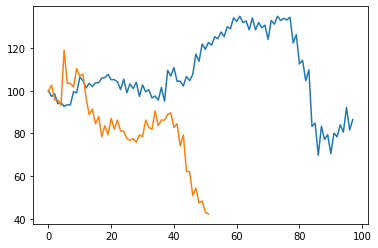

In [14]:
plt.plot(renko_close_i)
plt.plot(renko_close_p)

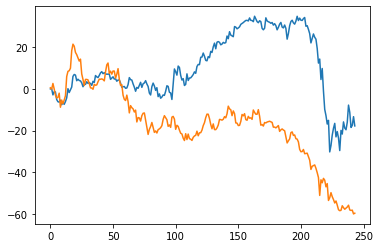

In [15]:
plt.plot((df_i['close']/4.072)-100)
plt.plot((df_p['close']/1.16)-100)

In [22]:
df_i['diff'] = (df_i['close']/4.072)-(df_p['close']/1.16)
df_p['diff'] = (df_i['close']/4.072)-(df_p['close']/1.16)

In [24]:
df_i['diff_c'] = 0

In [25]:
for i in range(len(df_i)):
    for j in range(i):
        df_i['diff_c'][i] += df_i['diff'][j]

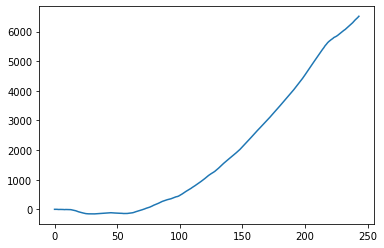

In [26]:
plt.plot(df_i['diff_c'])

In [21]:
df_i['diff']

0     -200.560345
1     -199.840119
2     -205.490312
3     -201.326130
4     -198.474782
          ...    
239   -153.125550
240   -160.142351
241   -159.264786
242   -153.279588
243   -158.069406
Name: diff, Length: 244, dtype: float64